In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interp
import csv

In [2]:
def mode_model(d, outpath_list):
        if d == "ax":
            mode = "Axial"
        if d == "co":
            mode = "Coronal"
        if d == "sa":
            mode = "Sagittal"
        if d == "axco":
            mode = "Axial & Coronal"
        if d == "axsa":
            mode = "Axial & Sagittal"
        if d == "cosa":
            mode = "Coronal & Sagittal"
        if d == "axcosa":
            mode = "Axial & Coronal & Sagittal"

        if "googlenet" in outpath_list:
            model = "GoogleNet"
        if "resnet" in outpath_list:
            model = "ResNet"
        if "vgg" in outpath_list:
            model = "VggNet"
        if "proposed" in outpath_list:
            model = "Proposed"

        return mode, model

In [37]:
def plot_learning_curve(train, test, g, model, mode):
    train_mean = np.mean(train, axis=0)
    train_std = np.std(train, axis=0)
    train_max = round(np.max(train_mean), 3)

    test_mean = np.mean(test, axis=0)
    test_std = np.std(test, axis=0)
    test_max = round(np.max(test_mean), 3)

    epoch = np.linspace(1, 30, 30)
    plt.figure()
    # Draw Lines
    plt.plot(epoch, train_mean, 'o-', color='blue', label='Train (Max: {})'.format(train_max))
    plt.plot(epoch, test_mean, 'o-', color='red', label='Test (Max: {})'.format(test_max))

    # Draw bands
    #plt.fill_between(epoch, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
    #plt.fill_between(epoch, test_mean - test_std, test_mean + test_std, color='#DDDDDD')

    plt.rc('font', size=12)

    # Create plot
    plt.grid()
    templte1 = "{} Learning Curve \n(Mild GO vs Controls)"
    plt.title(templte1.format(mode))
    plt.xlabel("Epoch number"), plt.ylabel("AUC"), plt.legend(loc="best")
    plt.tight_layout()
    # plt.show()
    
    templte2 = '../new4/results/plot/{}/{}/{} {}.png'
    plt.savefig(templte2.format(model, g, model, mode))
    return 

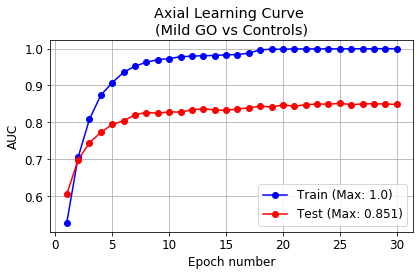

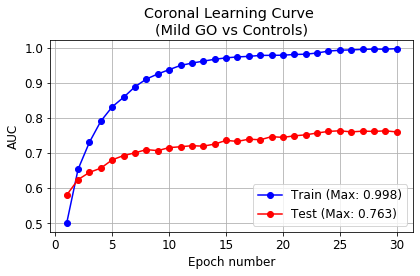

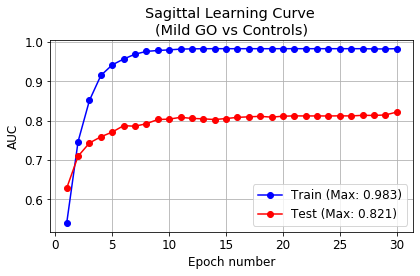

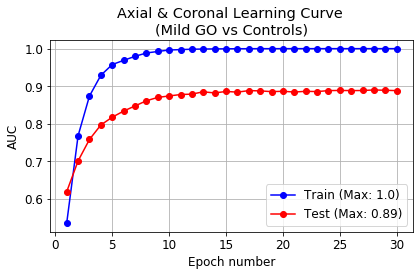

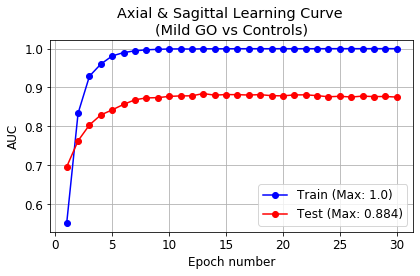

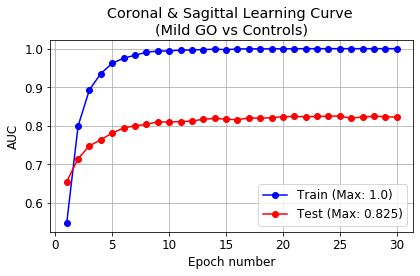

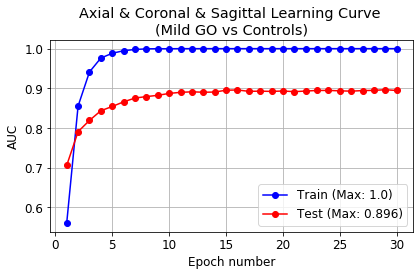

In [38]:
outpath_list = "../new4/results/proposed"
group = ["m_c"]
# group = ["s_c", "s_m", "m_c", "s_m_c"]
# dataset = ["ax", "co", "sa"]
dataset = ["ax", "co", "sa", "axco", "axsa", "cosa", "axcosa"]
# dataset = ["co"]
for g in group:
    for d in dataset:
        with open(outpath_list + '/' + g + '/' + d + '/train.txt', 'r') as f:
            reader = csv.reader(f, delimiter=" ", quoting=csv.QUOTE_NONNUMERIC)
            train_auc = list(reader)

        with open(outpath_list + '/' + g + '/' + d + '/test.txt', 'r') as f:
            reader = csv.reader(f, delimiter=" ", quoting=csv.QUOTE_NONNUMERIC)
            test_auc = list(reader)

        # Delete the null positioned last index
        for i in range(len(train_auc)):
            train_auc[i].pop()
            test_auc[i].pop()

        train = np.array(train_auc)
        test = np.array(test_auc)

        mode, model = mode_model(d, outpath_list)

        plot_learning_curve(train, test, g, model, mode)